# Ordinary differential equations

## Euler's method

Suppose we have an ODE:
$$
\frac{dx}{dt} = f(x,t).
$$

we have
$$
x(t+h) \approx x(t) + h \, f[x(t),t]~.
$$
We can iteratively apply this relation starting from $t = 0$ to evaluate $x(t)$ at $t > 0$.

This is the essence of the *Euler's method* -- the simplest method for solving ODEs numerically.

In [3]:
import numpy as np

def ode_euler_step(f, x, t, h):
    """Perform a single step h using Euler's scheme.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    xnew = x + h*f(x,t) #correct
    #doing x + h*(f(x,t)) will give wrong amplitute on x
    return xnew

def ode_euler(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using Euler's method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """

    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_euler_step(f, x[i], t[i], h) #remember- use the previous x,t to calculate x[i+1] and t[i+1]
    return t,x

Let us apply the Euler's method to solve the differential equation
$$
\frac{dx}{dt} = -x^3 + \sin t.
$$
with the initial condition $x_0 = 0$ at $t_0 = 0$ from $t = 0$ to $t = 10$ in 1000 steps.

(array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ], shape=(1001,)), array([0.00000000e+00, 0.00000000e+00, 9.99983333e-05, ...,
       4.46314908e-01, 4.40154542e-01, 4.33945771e-01], shape=(1001,)))


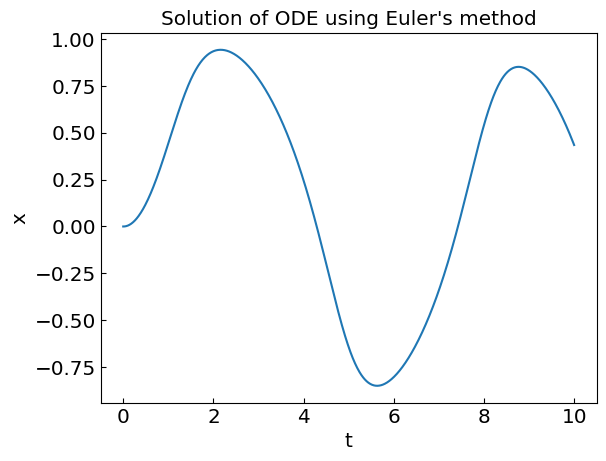

0.01


In [4]:
# Define the ODE
def f(x, t):
    return -x**3 + np.sin(t)

t0 = 0.
tend = 10.0
x0 = 0.

N = 1000
h = (tend - t0) / N #step size is determined by t(o) and t(end) divided by the number of steps

ODEsol = ode_euler(f, x0, t0, h, N)
print(ODEsol)
# Plot the solution
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(ODEsol[0],ODEsol[1]) #plot t by x
plt.xlabel('t')
plt.ylabel('x')
plt.title("Solution of ODE using Euler's method")
plt.show()
print(h)

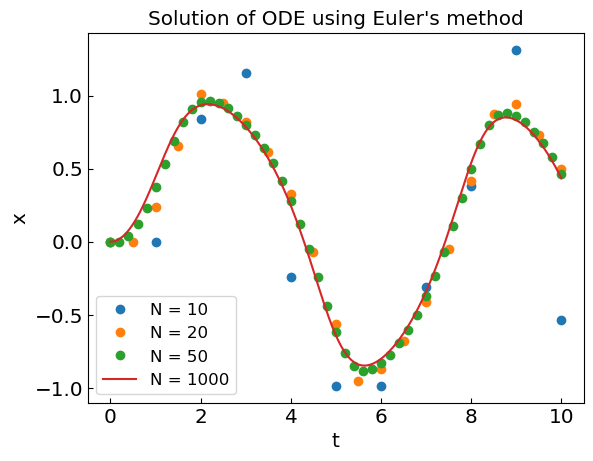

In [5]:
#use N=10, 20, 50, 1000 to see the effects of stepsize h
#create variables for the solutions: ODEsolN10, ODEsolN20, ODEsolN50, ODEsolN1000

N = 10
h = (tend - t0) / N
ODEsolN10 = ode_euler(f, x0, t0, h, N)

N = 20
h = (tend - t0) / N
ODEsolN20 = ode_euler(f, x0, t0, h, N)

N = 50
h = (tend - t0) / N
ODEsolN50 = ode_euler(f, x0, t0, h, N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_euler(f, x0, t0, h, N)


plt.plot(ODEsolN10[0], ODEsolN10[1], 'o', label='N = 10')
plt.plot(ODEsolN20[0], ODEsolN20[1], 'o', label='N = 20')
plt.plot(ODEsolN50[0], ODEsolN50[1], 'o', label='N = 50')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler's method")
plt.show()

The error of Euler's scheme is proportional to $h^2$ at each step. Since the total number of steps is $N = (t_{\rm end} - t_0)/h$, the total accumulated error is linear in $h$, i.e. of order $\mathcal{O}(h)$.

## The Fourth-Order Runge-Kutta method

The above logic can be generalized to cancel high-order error terms in various powers in $h$.
This will require more evaluations of function $f(x,t)$ at intermediate steps.
The following classical 4th order Runge-Kutta method is often considered to be a sweet spot.
It corresponds to the following scheme:
\begin{align}
k_1 & = h \, f(x,t), \\
k_2 & = h \, f(x+k_1/2,t+h/2), \\
k_3 & = h \, f(x+k_2/2,t+h/2), \\
k_4 & = h \, f(x+k_3,t+h), \\
x(t+h) & = x(t) + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)~.
\end{align}



In [6]:
def ode_rk4_step(f, x, t, h):
    """Perform a single step h using 4th order Runge-Kutta method.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    k3 = h * f(x + k2/2., t + h /2.)
    k4 = h * f(x + k3, t + h)
    return x + (k1 + 2. * k2 + 2. * k3 + k4) / 6.

def ode_rk4(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using 4th order Runge-Kutta method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i+1] = t[i] + h  #update t
        x[i+1] = ode_rk4_step(f, x[i], t[i], h)  #update x
    return t,x

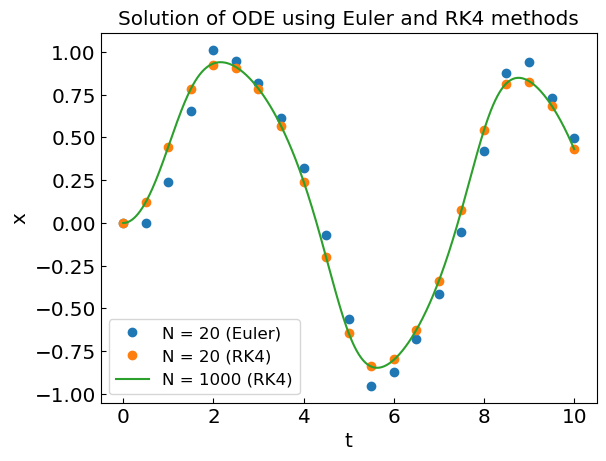

In [7]:
N = 20
h = (tend - t0) / N
ODEsolN10Euler = ode_euler(f,x0,t0,h,N)
ODEsolN10RK4 = ode_rk4(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000RK4 = ode_rk4(f,x0,t0,h,N)

plt.plot(ODEsolN10Euler[0], ODEsolN10Euler[1], 'o', label='N = 20 (Euler)')
plt.plot(ODEsolN10RK4[0], ODEsolN10RK4[1], 'o', label='N = 20 (RK4)')
plt.plot(ODEsolN1000RK4[0], ODEsolN1000RK4[1], label='N = 1000 (RK4)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler and RK4 methods")
plt.show()

#RK4 with 20 points is equivalent to RK4 with 1000 points, Euler with 20 points is not

## Systems of ODE

System of $N$ first-order ODEs
$$
\frac{d x_1}{dt} = f_1(x_1,\ldots,x_N,t),\\
\frac{d x_2}{dt} = f_2(x_1,\ldots,x_N,t),\\
\ldots \\
\frac{d x_N}{dt} = f_N(x_1,\ldots,x_N,t).
$$

In vector notation:
$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t).
$$

All the methods we covered have exactly the same structure for systems of ODEs, applied to vectors:
- Euler method
$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \, \mathbf{f}[\mathbf{x}(t),t]~.
$$


- RK2
\begin{align}
\mathbf {k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf {k_2} & = h \, \mathbf {f}(\mathbf {x}+\mathbf {k_1}/2,t+h/2), \\
\mathbf{x}(t+h) & = \mathbf {x}(t) + \mathbf {k_2}~.
\end{align}


- RK4
\begin{align}
\mathbf{k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf{k_2} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_1}/2,t+h/2), \\
\mathbf{k_3} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_2}/2,t+h/2), \\
\mathbf{k_4} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_3},t+h), \\
\mathbf{x}(t+h) & = \mathbf{x}(t) + \frac{1}{6} (\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4})~.
\end{align}


In [8]:
def ode_rk4_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the RK4 method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0] = x0
    for i in range(0, nsteps):
        t[i+1] = t[i] + h
        t[i+1] = ode_rk4_step(f, x[i], t[i], h)

    return t,x

Example: System of equations
\begin{align}
\frac{dx}{dt} & = xy - x,\\
\frac{dy}{dt} & = y - xy + (\sin t)^2
\end{align}

In [13]:
def ff(xin, t):
    x = xin[0] 
    y = xin[1] 
    return np.array([x*y-x,y-x*y+np.sin(t)]) #do calculations in here

a = 0.
b = 10.0
N = 100
h = (b-a)/N
#can use an initial position of [x,y]=[1.0,1.0] in the equation**

sol = ode_rk4_multi(ff, [1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]

plt.title("ODE system solution using RK4 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

ValueError: setting an array element with a sequence.

## Second-order ODEs

A system of $N$ 2nd-order ODEs

$$
\frac{d^2 \mathbf{x}}{dt^2} = \mathbf{f}(\mathbf{x}, d\mathbf{x}/dt,t),
$$

can be written as a system of $2N$ 1-st order ODEs by denoting $d\mathbf{x}/dt = \mathbf{v}$:

\begin{align*}
\frac{d \mathbf{x}}{dt} &= \mathbf{v},\\
\frac{d \mathbf{v}}{dt} &= \mathbf{f}(\mathbf{x}, \mathbf{v},t),
\end{align*}

and solved using standard methods.

This is particularly relevant for classical mechanics problems since Newton/Lagrange equations of motion correspond to a system of 2nd order ODEs.

## Simple pendulum in non-linear regime



In [12]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega, -g/L * np.sin(theta)]) 
    
#omega, and its derivative
theta0 = (20./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0, omega0])
a = 0.
b = 2.0
N = 5000
h = (b-a)/N

sol = ode_rk4_multi(fpendulum, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]

def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)


plt.title("Solving non-linear pendulum using RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='RK4')
plt.plot(tpoints,xpoints_small,label='${\\theta_0 cos(\sqrt{g/L}t)}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

ValueError: setting an array element with a sequence.

In [4]:
g = 9.81
L = 0.1
#change initial angle to 179 degree
#plot the comparison between RK4 and small angle approximation
#one can copy and modify the above code

????

NameError: name 'np' is not defined

## Comet motion 

The differential equation obeyed by a comet is straightforward to
derive.  The force between the Sun, with mass $M$ at the origin, and a
comet of mass $m$ with position vector $\vec{r}$ is $GMm/r^2$ in direction
$-\vec{r}/r$ (i.e., the direction towards the Sun), and hence Newton's
second law tells us that
$$
m {d^2\vec{r}\over d t^2} = -\biggl({GMm\over r^2}\biggr)\,{\vec{r}\over r}.
$$
Canceling the mass $m$ and taking the $x$ component we have
$$
{d^2 x\over d t^2} = -GM {x\over r^3}\,,
$$
and similarly for the other two coordinates.  We can, however, throw out
one of the coordinates because the comet stays in a single plane as it
orbits.  If we orient our axes so that this plane is perpendicular to
the $z$-axis, we can forget about the $z$ coordinate and we are left with
just two second-order equations to solve:
\begin{align*}
{d^2 x\over d t^2} & = -GM {x\over r^3}\,, \\
{d^2 y\over d t^2} & = -GM {y\over r^3}\,,
\end{align*}
where $r=\sqrt{x^2+y^2}$.

We will write a program to the equations using the fourth-order
Runge--Kutta method with a *fixed* step size.  
As an initial condition, we take a comet at coordinates $x=4$ billion kilometers
and $y=0$ (which is somewhere out around the orbit of Neptune) with
initial velocity $v_x=0$ and $v_y = 500\,\mathrm{m\,s}^{-1}$. The trajectory of the comet will be a plot of $y$
against $x$.

In [9]:
G = 6.67430e-11  # m^3 / kg / s^2
Msun = 1.9885e30 # kg

def fcomet(xin, t):
    ????

x0 = [4.e12,0.,0.,500.]  #initial conditions

a = 0.  #starting time
b = 50. * 365. * 24. * 60. * 60. # 50 years

????

Object `??` not found.
